https://moel.go.kr/faq/faqList.do

https://labor.moel.go.kr/cmmt/iqrs_list.do?gubun=ALL&searchVal=&stData=&edData=2024.10.21&sort=TITLE_ORDR&pageNum=2#

# 1. 탐색적 데이터분석

## 1.1 데이터 로드 및 기본 정보 확인

데이터프레임을 로드하고 데이터의 크기, 열 이름, 데이터 타입, 결측치 등을 확인합니다

In [7]:
# 데이터 처리 및 분석
import pandas as pd
import numpy as np

# 데이터 시각화
import matplotlib.pyplot as plt
import seaborn as sns

# 문자
import re

In [8]:
import pandas as pd

# 한글 깨짐 방지
plt.rcParams['font.family'] = "Malgun Gothic"

# 마이너스 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

In [15]:
import pandas as pd

df = pd.read_csv(r'C:\Users\sagey\Documents\새싹_빅데이터분석\NoF_프로젝트\근로_본문2.csv.csv', encoding='utf-8')
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5016 entries, 0 to 5015
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   판례정보일련번호  5016 non-null   int64 
 1   사건번호      5016 non-null   object
 2   선고        5016 non-null   object
 3   판결유형      5016 non-null   object
 4   판시사항      3735 non-null   object
 5   판결요지      3073 non-null   object
 6   참조조문      3724 non-null   object
 7   참조판례      2450 non-null   object
 8   판례내용      5016 non-null   object
dtypes: int64(1), object(8)
memory usage: 352.8+ KB
None


In [42]:
import pandas as pd
import re

# 1. 데이터프레임 전처리 함수 정의 (HTML 태그 및 공백 문자 제거)
def preprocess_content(content):
    if pd.isna(content):  # NaN 값에 대한 예외 처리
        return content
    
    # content가 문자열인지 확인
    if isinstance(content, str):
        content = content.replace('<br/>', '')  # HTML 태그 제거
        content = content.replace('\n', '')     # 줄바꿈 문자 제거
        content = content.replace('\r', '')     # 캐리지 리턴 문자 제거
    
    return content

# 2. 숫자와 특수문자 제거 함수 정의 (TF-IDF를 적용할 문서 리스트에 사용)
def preprocess_text(text):
    text = re.sub(r'\d+', '', text)  # 숫자 제거
    text = re.sub(r'[^\w\s]', '', text)  # 특수문자 제거
    text = text.replace('<br/>', ' ').replace('\n', ' ').replace('\r', ' ')  # 추가적인 불필요한 문자를 공백으로 대체
    return text

# 3. 데이터프레임의 여러 열에 전처리를 적용할 경우 (HTML 태그 제거)
columns_to_preprocess = ['판시사항', '판결요지', '판례내용']

# 각 열에 개별적으로 전처리 함수 적용
for col in columns_to_preprocess:
    if col in df.columns:
        df_labor[col] = df[col].apply(preprocess_content)

# 4. 전처리 후 결과 확인 (상위 5개 출력)
print(df_labor.head())

# 5. 문서 리스트에 숫자 및 특수 문자 제거 적용 (TF-IDF를 위한 전처리)
documents = df_labor['판례내용'].tolist()
documents = [preprocess_text(doc) for doc in documents]

# 전처리된 문서 리스트 확인 (상위 5개 출력)
print(documents[:5])


   판례정보일련번호                         사건번호  선고 판결유형  \
0    241221                   2024두32973  선고   판결   
1    241233  2024다211908, 211915, 211922  선고   판결   
2    241219                  2020다287921  선고   판결   
3    241051                  2021다274069  선고   판결   
4    241027                  2023다217312  선고   판결   

                                                판시사항  \
0   [1] 부당해고 등 구제절차에서 피신청인의 추가·변경이 허용되는지 여부(한정 적극...   
1   [1] 파견근로자 보호 등에 관한 법률에 따라 직접고용의무가 발생하였으나 사용사업...   
2   구 파견근로자 보호 등에 관한 법률에 따라 직접고용간주의 효과가 발생하였으나 사용...   
3   [1] 원고용주가 근로자로 하여금 제3자를 위한 업무를 수행하도록 하는 경우, 파...   
4   [1] 대학의 시간강사가 근로기준법 제18조 제3항에서 정한 ‘초단시간근로자’에 ...   

                                                판결요지  \
0   [1] 부당해고 등 구제절차에서 최초 구제신청의 대상이 된 불이익처분을 다투는 범...   
1   [1] 파견근로자 보호 등에 관한 법률에 따라 직접고용의무가 발생하였으나 사용사업...   
2   구 파견근로자 보호 등에 관한 법률(2006. 12. 21. 법률 제8076호로 ...   
3   [1] 원고용주가 어느 근로자로 하여금 제3자를 위한 업무를 수행하도록 하는 경우...   
4   [1] 근로기준법 제18조는 1주 동안의 소정근로시간이 그 사업장에서 같은 종류의...   

       

### 텍스트 전처리(완) -> 형태소 분석 -> 불용어 제거 -> 명사추출 -> 주제모델링

TF-IDF 진행

In [48]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# 1. 불용어 목록 파일 읽기
stop_words_file_path = r'C:\\Users\\sagey\\Documents\\MyGit\\SeSac-2024\\SeSac-2024\\data_file\\sorted_words.txt'

# 불용어 목록 파일 읽기
with open(stop_words_file_path, 'r', encoding='utf-8') as file:
    korean_stop_words = file.read().splitlines() 

# 2. TF-IDF 벡터라이저 설정: 상위 10,000개의 단어만 사용하고 불용어 제거
vectorizer = TfidfVectorizer(max_features=10000, stop_words=korean_stop_words, min_df=2, max_df=0.95)

# 3. 데이터프레임을 1000개씩 나눠서 처리할 준비
chunk_size = 1000
tfidf_결과 = []  # 청크 처리 결과를 저장할 리스트

print("처리 시작...")

# 4. 데이터를 청크로 나누어 처리
for i in range(0, len(문서들), chunk_size):
    # 현재 청크 데이터 추출
    문서_청크 = 문서들[i:i+chunk_size]
    
    # TF-IDF 적용
    tfidf_행렬 = vectorizer.fit_transform(문서_청크)
    
    # 청크 결과를 데이터프레임으로 변환하여 리스트에 저장
    tfidf_결과.append(pd.DataFrame(tfidf_행렬.toarray(), columns=vectorizer.get_feature_names_out()))
    
    # 청크 처리 완료 메시지 출력
    print(f"{i+chunk_size}개 문서 처리 완료")

# 5. 모든 청크를 하나의 데이터프레임으로 합침
tfidf_데이터프레임 = pd.concat(tfidf_결과, ignore_index=True)

# 6. 최종 결과 확인 (상위 5개 출력)
print("최종 결과:")
print(tfidf_데이터프레임.head())

# 7. 데이터프레임의 크기 및 처리 완료 메시지
print(f"TF-IDF 처리 완료. 최종 데이터프레임 크기: {tfidf_데이터프레임.shape}")


처리 시작...
1000개 문서 처리 완료
2000개 문서 처리 완료
3000개 문서 처리 완료
4000개 문서 처리 완료
5000개 문서 처리 완료
최종 결과:
    00  000  0001  000100  0002  000만  000만원  000만원을  000원  000원과  ...  휴가수당을  \
0  0.0  0.0   0.0     0.0   0.0   0.0    0.0     0.0   0.0    0.0  ...    NaN   
1  0.0  0.0   0.0     0.0   0.0   0.0    0.0     0.0   0.0    0.0  ...    NaN   
2  0.0  0.0   0.0     0.0   0.0   0.0    0.0     0.0   0.0    0.0  ...    NaN   
3  0.0  0.0   0.0     0.0   0.0   0.0    0.0     0.0   0.0    0.0  ...    NaN   
4  0.0  0.0   0.0     0.0   0.0   0.0    0.0     0.0   0.0    0.0  ...    NaN   

   휴가일수에  휴식시간  휴식시간을  휴업급여금  휴업수당의  휴업하는  휴직기간을  흠이  흡수  
0    NaN   NaN    NaN    NaN    NaN   NaN    NaN NaN NaN  
1    NaN   NaN    NaN    NaN    NaN   NaN    NaN NaN NaN  
2    NaN   NaN    NaN    NaN    NaN   NaN    NaN NaN NaN  
3    NaN   NaN    NaN    NaN    NaN   NaN    NaN NaN NaN  
4    NaN   NaN    NaN    NaN    NaN   NaN    NaN NaN NaN  

[5 rows x 20341 columns]
TF-IDF 처리 완료. 최종 데이터프레임 크기: (4940, 20341)


In [49]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# TF-IDF 벡터라이저 적용
vectorizer = TfidfVectorizer(max_features=10000)
tfidf_matrix = vectorizer.fit_transform(documents)

# K-Means 클러스터링 수행 (k=5로 설정)
num_clusters = 5
km = KMeans(n_clusters=num_clusters, random_state=42)
km.fit(tfidf_matrix)

# 클러스터별 상위 단어 및 그 단어들의 TF-IDF 값 확인
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

print("클러스터별 상위 단어 및 TF-IDF 값:")
for i in range(num_clusters):
    print(f"\n클러스터 {i+1}:")
    for ind in order_centroids[i, :10]:  # 상위 10개의 단어
        print(f"단어: {terms[ind]} - TF-IDF 값: {km.cluster_centers_[i, ind]}")


클러스터별 상위 단어 및 TF-IDF 값:

클러스터 1:
단어: 원고 - TF-IDF 값: 0.15557433991031266
단어: 피고 - TF-IDF 값: 0.12434891273679004
단어: 원고들의 - TF-IDF 값: 0.08397410590693961
단어: 사건 - TF-IDF 값: 0.06719096578691054
단어: 원고들이 - TF-IDF 값: 0.05785933757211702
단어: 대한 - TF-IDF 값: 0.05091044895834689
단어: 피고는 - TF-IDF 값: 0.04525773178932993
단어: 피고의 - TF-IDF 값: 0.04349079462566904
단어: 에게 - TF-IDF 값: 0.043163922630759445
단어: 같은 - TF-IDF 값: 0.04241685811093089

클러스터 2:
단어: 소외 - TF-IDF 값: 0.3480246270734092
단어: 사건 - TF-IDF 값: 0.08797782034115062
단어: 피고 - TF-IDF 값: 0.05895164361237031
단어: 원고의 - TF-IDF 값: 0.05672895336413266
단어: 대한 - TF-IDF 값: 0.04797334549412523
단어: 원고가 - TF-IDF 값: 0.04291669019260325
단어: 원고 - TF-IDF 값: 0.04223909331444477
단어: 같은 - TF-IDF 값: 0.04090078303957172
단어: 회사의 - TF-IDF 값: 0.040428739058323
단어: 원고는 - TF-IDF 값: 0.03974670519571133

클러스터 3:
단어: 같은 - TF-IDF 값: 0.05038483972238161
단어: 제조 - TF-IDF 값: 0.04267866927065245
단어: 피고 - TF-IDF 값: 0.04030595869743291
단어: 사건 - TF-IDF 값: 0.039181757886047636
단어: 

In [40]:
# 한글을 처리할 수 있는 벡터라이저 설정
vectorizer = TfidfVectorizer(token_pattern=r"(?u)\b\w+\b", max_features=10000)
tfidf_matrix = vectorizer.fit_transform(documents)


In [41]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# 예시 데이터프레임 생성 (실제 데이터프레임 df를 사용하면 됩니다)
# df = pd.read_csv('your_data.csv')

# '판례내용'에서 '근로'가 포함된 행만 선택 (최대 5000개까지 사용)
df_labor = df[df['판례내용'].str.contains('근로')].iloc[:5000]

# '판례내용' 열의 데이터를 리스트로 변환
문서들 = df_labor['판례내용'].tolist()

# TF-IDF 벡터라이저 설정: 상위 10,000개의 단어만 사용하고 불용어 제거
stop_words_file_path = r'C:\\Users\\sagey\\Documents\\MyGit\\SeSac-2024\\SeSac-2024\\data_file\\sorted_words.txt'

# 불용어 목록 파일 읽기
with open(stop_words_file_path, 'r', encoding='utf-8') as file:
    korean_stop_words = file.read().splitlines() 

벡터라이저 = TfidfVectorizer(max_features=10000, stop_words=korean_stop_words)

# 데이터프레임을 1000개씩 나눠서 처리할 준비
chunk_size = 1000
tfidf_결과 = []

print("처리 시작...")

# 데이터를 청크로 나누어 처리
for i in range(0, len(문서들), chunk_size):
    # 현재 청크 데이터 추출
    문서_청크 = 문서들[i:i+chunk_size]
    
    # TF-IDF 적용
    tfidf_행렬 = 벡터라이저.fit_transform(문서_청크)
    
    # 청크 결과를 데이터프레임으로 변환하여 리스트에 저장
    tfidf_결과.append(pd.DataFrame(tfidf_행렬.toarray(), columns=벡터라이저.get_feature_names_out()))
    
    # 청크 처리 완료 메시지 출력
    print(f"{i+chunk_size}개 문서 처리 완료")

# 모든 청크를 하나의 데이터프레임으로 합침
tfidf_데이터프레임 = pd.concat(tfidf_결과, ignore_index=True)

# 최종 결과 확인 (상위 5개 출력)
print("최종 결과:")
print(tfidf_데이터프레임.head())

# 데이터프레임의 크기 및 처리 완료 메시지
print(f"TF-IDF 처리 완료. 최종 데이터프레임 크기: {tfidf_데이터프레임.shape}")

처리 시작...
1000개 문서 처리 완료
2000개 문서 처리 완료
3000개 문서 처리 완료
4000개 문서 처리 완료
5000개 문서 처리 완료
최종 결과:
    00  000  0001  0002  000308  000개  000공소외  000만  000만원을  000원  ...  휴식시간을  \
0  0.0  0.0   0.0   0.0     0.0   0.0     0.0   0.0     0.0   0.0  ...    NaN   
1  0.0  0.0   0.0   0.0     0.0   0.0     0.0   0.0     0.0   0.0  ...    NaN   
2  0.0  0.0   0.0   0.0     0.0   0.0     0.0   0.0     0.0   0.0  ...    NaN   
3  0.0  0.0   0.0   0.0     0.0   0.0     0.0   0.0     0.0   0.0  ...    NaN   
4  0.0  0.0   0.0   0.0     0.0   0.0     0.0   0.0     0.0   0.0  ...    NaN   

   휴업급여금  휴업수당의  휴업하는  휴직기간은  휴직기간을  휴직기간의  흔적을  흠이  흡수  
0    NaN    NaN   NaN    NaN    NaN    NaN  NaN NaN NaN  
1    NaN    NaN   NaN    NaN    NaN    NaN  NaN NaN NaN  
2    NaN    NaN   NaN    NaN    NaN    NaN  NaN NaN NaN  
3    NaN    NaN   NaN    NaN    NaN    NaN  NaN NaN NaN  
4    NaN    NaN   NaN    NaN    NaN    NaN  NaN NaN NaN  

[5 rows x 20892 columns]
TF-IDF 처리 완료. 최종 데이터프레임 크기: (4940, 20892)


In [52]:
import pandas as pd
import re

# 1. 데이터프레임 전처리 함수 정의 (HTML 태그 및 공백 문자 제거)
def preprocess_content(content):
    if pd.isna(content):  # NaN 값에 대한 예외 처리
        return content
    
    # content가 문자열인지 확인
    if isinstance(content, str):
        content = content.replace('<br/>', '')  # HTML 태그 제거
        content = content.replace('\n', '')     # 줄바꿈 문자 제거
        content = content.replace('\r', '')     # 캐리지 리턴 문자 제거
    
    return content

# 2. 숫자와 특수문자 제거 함수 정의 (TF-IDF를 적용할 문서 리스트에 사용)
def preprocess_text(text):
    text = re.sub(r'\d+', '', text)  # 숫자 제거
    text = re.sub(r'[^\w\s]', '', text)  # 특수문자 제거
    text = text.replace('<br/>', ' ').replace('\n', ' ').replace('\r', ' ')  # 추가적인 불필요한 문자를 공백으로 대체
    return text

# 예시로 데이터프레임을 만듭니다. 실제로는 df가 이미 데이터프레임이어야 합니다.
# df = pd.read_csv('your_file.csv')

# 데이터프레임 확인 (데이터프레임이 맞는지 확인)
print(type(df))  # 이 출력에서 <class 'pandas.core.frame.DataFrame'>가 나와야 함

# 3. 데이터프레임의 여러 열에 전처리를 적용할 경우 (HTML 태그 제거)
columns_to_preprocess = ['판시사항', '판결요지', '판례내용']

# 각 열에 개별적으로 전처리 함수 적용
df_labor = df.copy()  # 원본 데이터프레임을 복사하여 사용
for col in columns_to_preprocess:
    if col in df_labor.columns:  # 데이터프레임에 해당 열이 존재하는지 확인
        df_labor[col] = df_labor[col].apply(preprocess_content)

# 4. 전처리 후 데이터프레임 확인 (상위 5개 출력)
print(df_labor.head())

# 5. 문서 리스트에 숫자 및 특수 문자 제거 적용 (TF-IDF를 위한 전처리)
documents = df_labor['판례내용'].tolist()
documents = [preprocess_text(doc) for doc in documents]

# 전처리된 문서 리스트 확인 (상위 5개 출력)
print(documents[:5])


# 전처리된 문서 리스트 확인 (상위 5개 출력)
print(documents[:5])

# 6. TF-IDF 벡터라이저 설정: 상위 10,000개의 단어만 사용하고 불용어 제거
stop_words_file_path = r'C:\\Users\\sagey\\Documents\\MyGit\\SeSac-2024\\SeSac-2024\\data_file\\sorted_words.txt'

# 불용어 목록 파일 읽기
with open(stop_words_file_path, 'r', encoding='utf-8') as file:
    korean_stop_words = file.read().splitlines() 

# 벡터라이저 설정
vectorizer = TfidfVectorizer(max_features=10000, stop_words=korean_stop_words, min_df=2, max_df=0.95)

# 7. 데이터프레임을 1000개씩 나눠서 처리할 준비
chunk_size = 1000
tfidf_결과 = []  # 청크 처리 결과를 저장할 리스트

print("처리 시작...")

# 8. 데이터를 청크로 나누어 처리
for i in range(0, len(documents), chunk_size):
    # 현재 청크 데이터 추출
    문서_청크 = documents[i:i+chunk_size]
    
    # TF-IDF 적용
    tfidf_행렬 = vectorizer.fit_transform(문서_청크)
    
    # 청크 결과를 데이터프레임으로 변환하여 리스트에 저장
    tfidf_결과.append(pd.DataFrame(tfidf_행렬.toarray(), columns=vectorizer.get_feature_names_out()))
    
    # 청크 처리 완료 메시지 출력
    print(f"{i+chunk_size}개 문서 처리 완료")

# 9. 모든 청크를 하나의 데이터프레임으로 합침
tfidf_데이터프레임 = pd.concat(tfidf_결과, ignore_index=True)

# 10. 최종 결과 확인 (상위 5개 출력)
print("최종 결과:")
print(tfidf_데이터프레임.head())

# 11. 데이터프레임의 크기 및 처리 완료 메시지
print(f"TF-IDF 처리 완료. 최종 데이터프레임 크기: {tfidf_데이터프레임.shape}")


<class 'pandas.core.frame.DataFrame'>
   판례정보일련번호                         사건번호  선고 판결유형  \
0    241221                   2024두32973  선고   판결   
1    241233  2024다211908, 211915, 211922  선고   판결   
2    241219                  2020다287921  선고   판결   
3    241051                  2021다274069  선고   판결   
4    241027                  2023다217312  선고   판결   

                                                판시사항  \
0   [1] 부당해고 등 구제절차에서 피신청인의 추가·변경이 허용되는지 여부(한정 적극...   
1   [1] 파견근로자 보호 등에 관한 법률에 따라 직접고용의무가 발생하였으나 사용사업...   
2   구 파견근로자 보호 등에 관한 법률에 따라 직접고용간주의 효과가 발생하였으나 사용...   
3   [1] 원고용주가 근로자로 하여금 제3자를 위한 업무를 수행하도록 하는 경우, 파...   
4   [1] 대학의 시간강사가 근로기준법 제18조 제3항에서 정한 ‘초단시간근로자’에 ...   

                                                판결요지  \
0   [1] 부당해고 등 구제절차에서 최초 구제신청의 대상이 된 불이익처분을 다투는 범...   
1   [1] 파견근로자 보호 등에 관한 법률에 따라 직접고용의무가 발생하였으나 사용사업...   
2   구 파견근로자 보호 등에 관한 법률(2006. 12. 21. 법률 제8076호로 ...   
3   [1] 원고용주가 어느 근로자로 하여금 제3자를 위한 업무를 수행하도록 하는 경우...   
4   [1] 근로기준법 제18조는 1주 동안의

클러스터별 상위 10개 단어:

클러스터 1:
 같은
 피고
 사건
 선고
 상고를
 관한
 없다
 판결
 대한
 원심판결

클러스터 2:
 소외
 사건
 피고
 원고의
 원고
 대한
 원고가
 회사의
 같은
 원고는

클러스터 3:
 사건
 원고의
 원고가
 원고는
 대한
 피고는
 피고
 있는
 한다
 같은

클러스터 4:
 원고
 원고들의
 피고
 원고들이
 사건
 피고의
 피고는
 대한
 원고들은
 같은

클러스터 5:
 공소외
 피고인
 피고인이
 피고인은
 피고인의
 대한
 사건
 형법
 같은
 1이


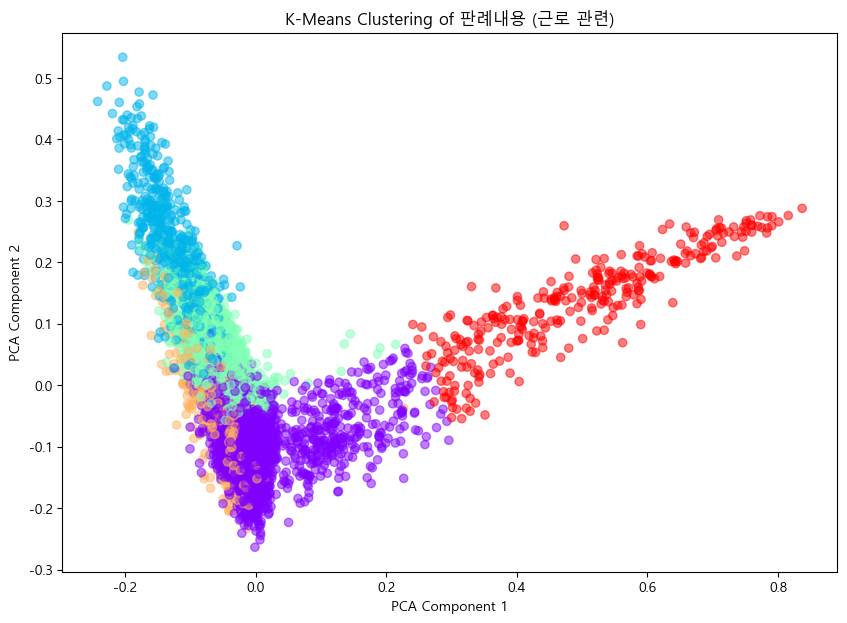

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 1. '판례내용'에서 '근로'가 포함된 행만 필터링 (NaN 값 처리 포함)
df_labor = df[df['판례내용'].notna() & df['판례내용'].str.contains('근로')].iloc[:5000]

# 2. 판례내용을 리스트로 변환
documents = df_labor['판례내용'].tolist()

# 3. 전처리 함수 정의 (옵션)
def preprocess_text(text):
    text = text.replace('<br/>', ' ').replace('\n', ' ').replace('\r', ' ')
    return text

# 각 문서에 대해 전처리 적용
documents = [preprocess_text(doc) for doc in documents]

# 4. TF-IDF 벡터라이저 적용
vectorizer = TfidfVectorizer(max_features=10000)
tfidf_matrix = vectorizer.fit_transform(documents)

# 5. K-Means 클러스터링 수행 (k=5로 설정)
num_clusters = 5
km = KMeans(n_clusters=num_clusters, random_state=42)
km.fit(tfidf_matrix)

# 6. 클러스터 라벨 확인
clusters = km.labels_.tolist()

# 7. 데이터프레임에 클러스터 결과 추가
df_labor['Cluster'] = clusters

# 8. 각 클러스터별로 TF-IDF가 높은 단어 확인 (상위 10개 단어 출력)
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

print("클러스터별 상위 10개 단어:")
for i in range(num_clusters):
    print(f"\n클러스터 {i+1}:")
    for ind in order_centroids[i, :10]:
        print(f" {terms[ind]}")

# 9. PCA를 사용한 2D 시각화 (차원 축소)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(tfidf_matrix.toarray())

plt.figure(figsize=(10, 7))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='rainbow', alpha=0.5)
plt.title('K-Means Clustering of 판례내용 (근로 관련)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


클러스터별 상위 10개 단어:

클러스터 1:
 사건
 원고의
 제조
 원고가
 원고는
 대한
 있는
 제항
 같은
 따라

클러스터 2:
 소외
 사건
 원고의
 피고
 대한
 원고가
 원고는
 원고
 같은
 회사의

클러스터 3:
 공소외
 피고인
 피고인이
 피고인은
 제조
 피고인의
 대한
 사건
 같은
 형법

클러스터 4:
 같은
 피고
 선고
 관한
 상고를
 제조
 없다
 사건
 대한
 상고비용은

클러스터 5:
 원고
 피고
 원고들의
 사건
 대한
 원고들이
 피고는
 피고의
 부터
 같은


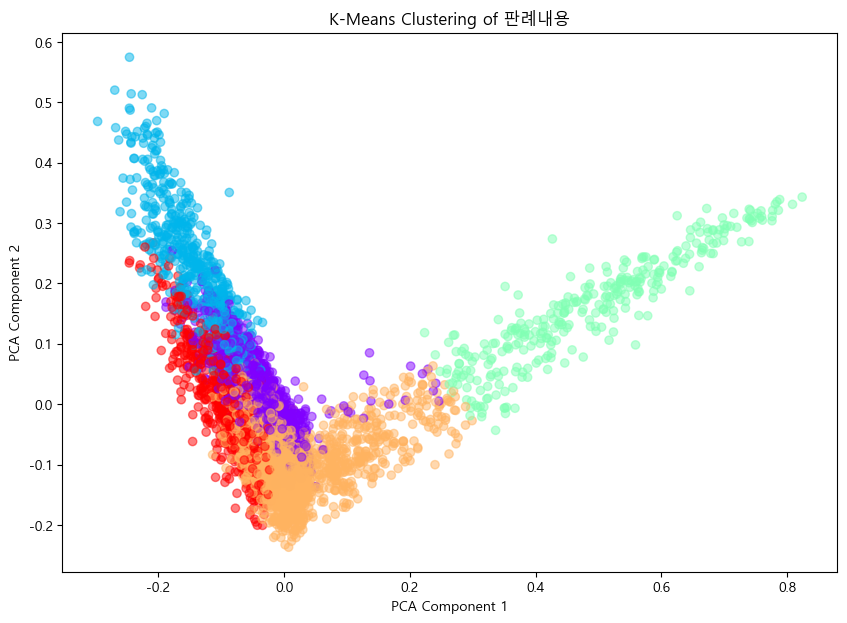

In [55]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 1. 데이터프레임 전처리 함수 정의 (HTML 태그 및 공백 문자 제거)
def preprocess_content(content):
    if pd.isna(content):  # NaN 값에 대한 예외 처리
        return content
    
    if isinstance(content, str):
        content = content.replace('<br/>', '')  # HTML 태그 제거
        content = content.replace('\n', '')     # 줄바꿈 문자 제거
        content = content.replace('\r', '')     # 캐리지 리턴 문자 제거
    
    return content

# 2. 숫자와 특수문자 제거 함수 정의 (TF-IDF를 적용할 문서 리스트에 사용)
def preprocess_text(text):
    text = re.sub(r'\d+', '', text)  # 숫자 제거
    text = re.sub(r'[^\w\s]', '', text)  # 특수문자 제거
    text = text.replace('<br/>', ' ').replace('\n', ' ').replace('\r', ' ')
    return text

# 3. 데이터프레임의 여러 열에 전처리를 적용할 경우
columns_to_preprocess = ['판시사항', '판결요지', '판례내용']

# 데이터프레임 복사 후 전처리 함수 적용
df_labor = df.copy()
for col in columns_to_preprocess:
    if col in df_labor.columns:
        df_labor[col] = df_labor[col].apply(preprocess_content)

# 4. 전처리된 '판례내용'을 리스트로 변환
documents = df_labor['판례내용'].tolist()
documents = [preprocess_text(doc) for doc in documents]

# 5. TF-IDF 벡터라이저 설정: 상위 10,000개의 단어만 사용하고 불용어 제거
vectorizer = TfidfVectorizer(max_features=10000, stop_words='english', min_df=2, max_df=0.95)

# 6. TF-IDF 적용
tfidf_matrix = vectorizer.fit_transform(documents)

# 7. K-Means 클러스터링 수행 (클러스터 수를 5로 설정)
num_clusters = 5  # 원하는 클러스터 수로 변경 가능
km = KMeans(n_clusters=num_clusters, random_state=42)
km.fit(tfidf_matrix)

# 8. 각 문서가 어느 클러스터에 속하는지 확인
clusters = km.labels_.tolist()

# 9. 데이터프레임에 클러스터 결과 추가
df_labor['Cluster'] = clusters

# 클러스터별 상위 단어 확인 (상위 10개 단어 출력)
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

print("클러스터별 상위 10개 단어:")
for i in range(num_clusters):
    print(f"\n클러스터 {i+1}:")
    for ind in order_centroids[i, :10]:
        print(f" {terms[ind]}")

# 10. PCA를 사용한 2D 시각화 (차원 축소)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(tfidf_matrix.toarray())

plt.figure(figsize=(10, 7))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='rainbow', alpha=0.5)
plt.title('K-Means Clustering of 판례내용')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


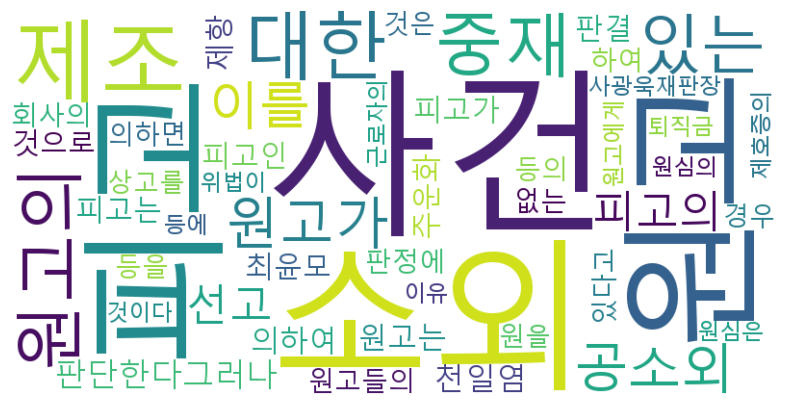

In [53]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from matplotlib import font_manager

# 한글 폰트 설정 (예: Malgun Gothic)
# 시스템에 설치된 폰트 중 원하는 폰트를 선택
font_path = 'C:/Windows/Fonts/malgun.ttf'  # Windows에서의 경우
# MacOS의 경우 'AppleGothic.ttf' 같은 폰트 경로를 설정할 수 있습니다.

# TF-IDF 벡터라이저 설정 (위에서 이미 계산한 데이터프레임 사용)
# 상위 중요 단어 50개만 시각화
top_n = 50

# 각 단어별 평균 TF-IDF 점수를 계산
tfidf_means = tfidf_데이터프레임.mean().sort_values(ascending=False)[:top_n]

# 워드클라우드 생성, 한글 폰트 적용
wordcloud = WordCloud(
    font_path=font_path,  # 한글 폰트 경로 지정
    width=800, 
    height=400, 
    background_color='white'
).generate_from_frequencies(tfidf_means)

# 워드클라우드 출력
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 축을 숨김
plt.show()


네트워크 구성
메모리 문제로 에러 /단어수 사용 제한 5000->2000개

In [32]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import networkx as nx

# 1. '판례내용'에서 '근로'가 포함된 행만 필터링 (NaN 값 처리 포함)
df_labor = df[df['판례내용'].notna() & df['판례내용'].str.contains('근로')].iloc[:5000]

# 2. 판례내용을 리스트로 변환
documents = df_labor['판례내용'].tolist()

# 3. 전처리 함수 정의 (옵션)
def preprocess_text(text):
    text = text.replace('<br/>', ' ').replace('\n', ' ').replace('\r', ' ')
    return text

# 각 문서에 대해 전처리 적용
documents = [preprocess_text(doc) for doc in documents]

# 4. TF-IDF 벡터라이저 적용
vectorizer = TfidfVectorizer(max_features=10000)
tfidf_matrix = vectorizer.fit_transform(documents)

# 5. K-Means 클러스터링 수행 (k=5로 설정)
num_clusters = 5
km = KMeans(n_clusters=num_clusters, random_state=42)
km.fit(tfidf_matrix)

# 6. 클러스터 라벨 확인
clusters = km.labels_.tolist()

# 7. 데이터프레임에 클러스터 결과 추가
df_labor['Cluster'] = clusters

# 8. 각 클러스터별로 TF-IDF가 높은 단어 확인 (상위 10개 단어 출력)
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

cluster_top_terms = {}

print("클러스터별 상위 10개 단어:")
for i in range(num_clusters):
    print(f"\n클러스터 {i+1}:")
    top_terms = [terms[ind] for ind in order_centroids[i, :10]]
    cluster_top_terms[i] = top_terms  # 클러스터별 상위 10개 단어 저장
    for term in top_terms:
        print(f" {term}")

클러스터별 상위 10개 단어:

클러스터 1:
 같은
 피고
 사건
 선고
 상고를
 관한
 없다
 판결
 대한
 원심판결

클러스터 2:
 소외
 사건
 피고
 원고의
 원고
 대한
 원고가
 회사의
 같은
 원고는

클러스터 3:
 사건
 원고의
 원고가
 원고는
 대한
 피고는
 피고
 있는
 한다
 같은

클러스터 4:
 원고
 원고들의
 피고
 원고들이
 사건
 피고의
 피고는
 대한
 원고들은
 같은

클러스터 5:
 공소외
 피고인
 피고인이
 피고인은
 피고인의
 대한
 사건
 형법
 같은
 1이


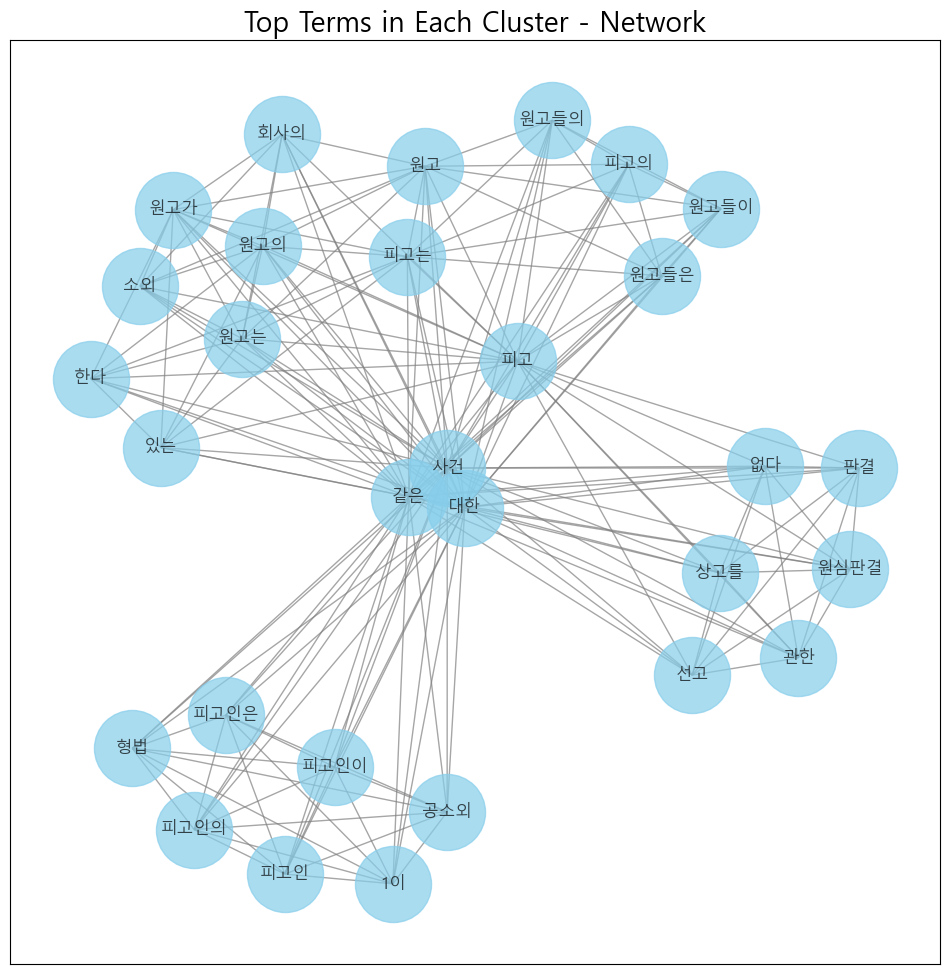

In [54]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import networkx as nx

# 한글 폰트 설정 (Windows에서의 Malgun Gothic)
font_path = 'C:/Windows/Fonts/malgun.ttf'  # 폰트 경로 설정
font_prop = fm.FontProperties(fname=font_path)

G = nx.Graph()

# 클러스터별 상위 단어들 사이의 엣지를 추가
for cluster, top_terms in cluster_top_terms.items():
    for i in range(len(top_terms)):
        for j in range(i+1, len(top_terms)):
            G.add_edge(top_terms[i], top_terms[j], weight=1)  # 단순 엣지 추가 (공동 출현 가정)

# 네트워크 시각화
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.5, iterations=50)

# 노드 및 엣지 그리기, 한글 폰트 적용
nx.draw_networkx(G, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=12, font_color="black", edge_color="gray", alpha=0.7, font_family=font_prop.get_name())

# 제목에도 한글 폰트 적용
plt.title("Top Terms in Each Cluster - Network", fontproperties=font_prop, fontsize=20)

plt.show()


각 주제별 상위 10개 단어:

주제 1:
같은 제조 원고 선고 관한 피고 없다 대한 대하여 따라

주제 2:
사건 소외 피고 원고 대한 원고의 원고가 대하여 이를 피고는

주제 3:
사건 같은 있는 제조 원고 대한 관한 또는 있다 따라

주제 4:
공소외 피고인 같은 대한 에게 있는 회사 관련 있다 생략

주제 5:
피고인 공소외 대한 제조 사건 같은 있는 제항 관한 피고인이

문서별 주요 주제 분포:
                                                판례내용  Dominant_Topic
0  【원고, 상고인】 주식회사 ○○ (소송대리인 변호사 김소영 외 5인)【피고, 피상고...               2
1  【원고, 피상고인】 원고 1 외 2인 (소송대리인 변호사 조창래)【피고, 상고인】 ...               0
2  【원고, 피상고인】 별지 원고들 명단 기재와 같다. (소송대리인 변호사 방광호)【피...               0
3  【원고, 피상고인】 원고 1 외 1인 (소송대리인 법무법인 금강 담당변호사 고규정 ...               2
4  【원고, 상고인】 원고 1 외 7인 (소송대리인 법무법인 창조 외 3인)【피고, 피...               0


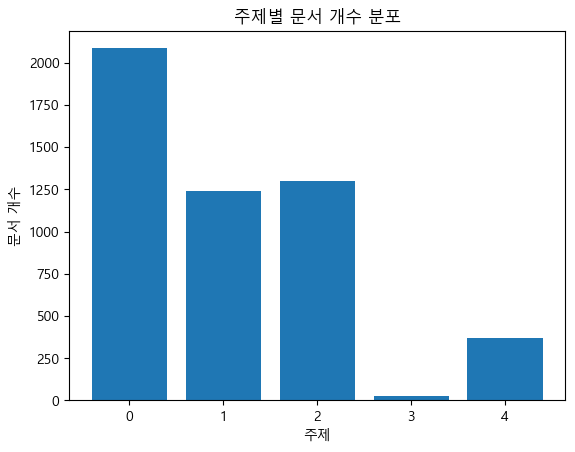

In [56]:
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt

# 1. 데이터프레임 전처리 함수 정의 (HTML 태그 및 공백 문자 제거)
def preprocess_content(content):
    if pd.isna(content):  # NaN 값에 대한 예외 처리
        return content
    
    if isinstance(content, str):
        content = content.replace('<br/>', '')  # HTML 태그 제거
        content = content.replace('\n', '')     # 줄바꿈 문자 제거
        content = content.replace('\r', '')     # 캐리지 리턴 문자 제거
    
    return content

# 2. 숫자와 특수문자 제거 함수 정의 (LDA를 적용할 문서 리스트에 사용)
def preprocess_text(text):
    text = re.sub(r'\d+', '', text)  # 숫자 제거
    text = re.sub(r'[^\w\s]', '', text)  # 특수문자 제거
    text = text.replace('<br/>', ' ').replace('\n', ' ').replace('\r', ' ')
    return text

# 3. 데이터프레임의 여러 열에 전처리를 적용할 경우
columns_to_preprocess = ['판시사항', '판결요지', '판례내용']

# 데이터프레임 복사 후 전처리 함수 적용
df_labor = df.copy()
for col in columns_to_preprocess:
    if col in df_labor.columns:
        df_labor[col] = df_labor[col].apply(preprocess_content)

# 4. 전처리된 '판례내용'을 리스트로 변환
documents = df_labor['판례내용'].tolist()
documents = [preprocess_text(doc) for doc in documents]

# 5. Count Vectorizer 설정 (상위 10,000개의 단어만 사용)
vectorizer = CountVectorizer(max_features=10000, stop_words='english', min_df=2, max_df=0.95)

# 6. Count Vectorizer를 사용하여 문서 벡터화
count_matrix = vectorizer.fit_transform(documents)

# 7. LDA 모델 생성 (주제 수는 5로 설정, 원하는 주제 수로 변경 가능)
num_topics = 5  # 원하는 토픽 수로 변경 가능
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)

# 8. LDA 모델을 사용하여 주제 추출
lda.fit(count_matrix)

# 9. 각 주제에 대한 상위 단어 출력
terms = vectorizer.get_feature_names_out()

def print_topics(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"\n주제 {topic_idx+1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

# 주제별 상위 10개 단어 출력
print("각 주제별 상위 10개 단어:")
print_topics(lda, terms, 10)

# 10. 문서별 주제 분포 확인
doc_topic_distribution = lda.transform(count_matrix)

# 문서별 상위 1개 주제를 확인
df_labor['Dominant_Topic'] = doc_topic_distribution.argmax(axis=1)
print("\n문서별 주요 주제 분포:")
print(df_labor[['판례내용', 'Dominant_Topic']].head())

# 11. 주제별 문서 개수 시각화
topic_counts = df_labor['Dominant_Topic'].value_counts()
plt.bar(topic_counts.index, topic_counts.values)
plt.xlabel("주제")
plt.ylabel("문서 개수")
plt.title("주제별 문서 개수 분포")
plt.show()


각 열 값에 대해 코사인 유사도 구하기

In [57]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re

# 1. 데이터프레임 전처리 함수 정의 (특수문자 제거, 공백 처리 등)
def preprocess_text(text):
    text = re.sub(r'\d+', '', text)  # 숫자 제거
    text = re.sub(r'[^\w\s]', '', text)  # 특수문자 제거
    text = text.replace('<br/>', ' ').replace('\n', ' ').replace('\r', ' ')
    return text

# 2. 데이터프레임의 열에서 '판례내용' 전처리 적용
df_labor = df.copy()

# 3. 불용어 목록 파일 읽기
stop_words_file_path = r'C:\\Users\\sagey\\Documents\\MyGit\\SeSac-2024\\SeSac-2024\\data_file\\sorted_words.txt'

# 불용어 목록 파일 읽기
with open(stop_words_file_path, 'r', encoding='utf-8') as file:
    korean_stop_words = file.read().splitlines() 

# '판례내용'에 대해 전처리 적용
df_labor['판례내용'] = df_labor['판례내용'].apply(preprocess_text)

# 4. 전처리된 '판례내용'을 리스트로 변환
documents = df_labor['판례내용'].tolist()

# 5. TF-IDF 벡터라이저 설정 및 불용어 처리 추가
# stop_words에 불용어 목록을 전달
vectorizer = TfidfVectorizer(max_features=10000, stop_words=korean_stop_words, min_df=2, max_df=0.95)

# 문서들을 TF-IDF 벡터화
tfidf_matrix = vectorizer.fit_transform(documents)

# 6. 코사인 유사도 계산
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# 7. 코사인 유사도 결과를 데이터프레임으로 변환 (각 문서 간 유사도를 보기 위해)
cosine_sim_df = pd.DataFrame(cosine_sim, index=df_labor.index, columns=df_labor.index)

# 코사인 유사도 결과 확인 (상위 5개 출력)
print("각 판례들 간의 코사인 유사도 (상위 5개 문서):")
print(cosine_sim_df.head())


각 판례들 간의 코사인 유사도 (상위 5개 문서):
       0         1         2         3         4         5         6     \
0  1.000000  0.065280  0.064549  0.155242  0.065126  0.038724  0.060551   
1  0.065280  1.000000  0.465884  0.448320  0.090012  0.044105  0.058373   
2  0.064549  0.465884  1.000000  0.262957  0.100654  0.072648  0.102811   
3  0.155242  0.448320  0.262957  1.000000  0.098768  0.037221  0.067140   
4  0.065126  0.090012  0.100654  0.098768  1.000000  0.032605  0.045332   

       7         8         9     ...      5006      5007      5008      5009  \
0  0.068888  0.052449  0.074350  ...  0.044009  0.030964  0.154964  0.074872   
1  0.086329  0.099299  0.199919  ...  0.052750  0.024315  0.040930  0.057646   
2  0.114883  0.054330  0.230136  ...  0.065407  0.022472  0.031190  0.058771   
3  0.115125  0.064025  0.161647  ...  0.049396  0.033219  0.048615  0.074648   
4  0.083873  0.034686  0.103206  ...  0.071930  0.029511  0.018051  0.057008   

       5010      5011      5012      50

In [58]:
import pandas as pd
import re

# 1. 전처리 함수 정의 (특수문자 제거, 공백 처리 등)
def preprocess_text(text):
    text = re.sub(r'\d+', '', text)  # 숫자 제거
    text = re.sub(r'[^\w\s]', '', text)  # 특수문자 제거
    text = text.replace('<br/>', ' ').replace('\n', ' ').replace('\r', ' ')
    return text

# 2. 데이터프레임의 열에서 '판례내용' 전처리 적용
df_labor = df.copy()

# '판례내용'에 대해 전처리 적용
df_labor['판례내용'] = df_labor['판례내용'].apply(preprocess_text)

# 3. 키워드 기반 분류 함수 정의
def classify_content(text):
    # 키워드 정의 (각 카테고리별로 관련된 키워드들을 설정)
    keywords_기업 = ['기업', '회사', '법인', '주식', '주주', '비즈니스']
    keywords_근로자 = ['근로자', '노동자', '종업원', '고용', '노동', '임금']
    keywords_계약 = ['계약', '합의', '협약', '약정', '계약서']
    keywords_업무 = ['업무', '직무', '직책', '책임', '업무상']
    keywords_회사 = ['회사', '사업장', '법인', '조직', '기업']

    # 카테고리 초기화
    categories = []

    # 키워드가 포함되어 있는지 확인하고, 카테고리 추가
    if any(keyword in text for keyword in keywords_기업):
        categories.append('기업 관련')
    if any(keyword in text for keyword in keywords_근로자):
        categories.append('근로자 관련')
    if any(keyword in text for keyword in keywords_계약):
        categories.append('계약 관련')
    if any(keyword in text for keyword in keywords_업무):
        categories.append('업무 관련')
    if any(keyword in text for keyword in keywords_회사):
        categories.append('회사 관련')

    # 카테고리가 없으면 '기타'로 분류
    if not categories:
        return '기타'
    
    # 여러 카테고리가 있을 경우 합쳐서 반환
    return ', '.join(categories)

# 4. 판례 내용에 따라 카테고리 분류 적용
df_labor['분류'] = df_labor['판례내용'].apply(classify_content)

# 5. 분류된 결과 확인 (상위 5개 출력)
print(df_labor[['판례내용', '분류']].head())


                                                판례내용  \
0  원고 상고인 주식회사  소송대리인 변호사 김소영 외 인br피고 피상고인 중앙노동위원...   
1  원고 피상고인 원고  외 인 소송대리인 변호사 조창래br피고 상고인  주식회사 소송...   
2  원고 피상고인 별지 원고들 명단 기재와 같다 소송대리인 변호사 방광호br피고 상고인...   
3  원고 피상고인 원고  외 인 소송대리인 법무법인 금강 담당변호사 고규정 외 인br피...   
4  원고 상고인 원고  외 인 소송대리인 법무법인 창조 외 인br피고 피상고인 대한민국...   

                                   분류  
0  기업 관련, 근로자 관련, 계약 관련, 업무 관련, 회사 관련  
1         기업 관련, 근로자 관련, 업무 관련, 회사 관련  
2         기업 관련, 근로자 관련, 업무 관련, 회사 관련  
3  기업 관련, 근로자 관련, 계약 관련, 업무 관련, 회사 관련  
4  기업 관련, 근로자 관련, 계약 관련, 업무 관련, 회사 관련  


c:\Users\sagey\anaconda3\envs\project\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\sagey\anaconda3\envs\project\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50557 (\N{HANGUL SYLLABLE YAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\sagey\anaconda3\envs\project\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\sagey\anaconda3\envs\project\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\sagey\anaconda3\envs\project\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) m

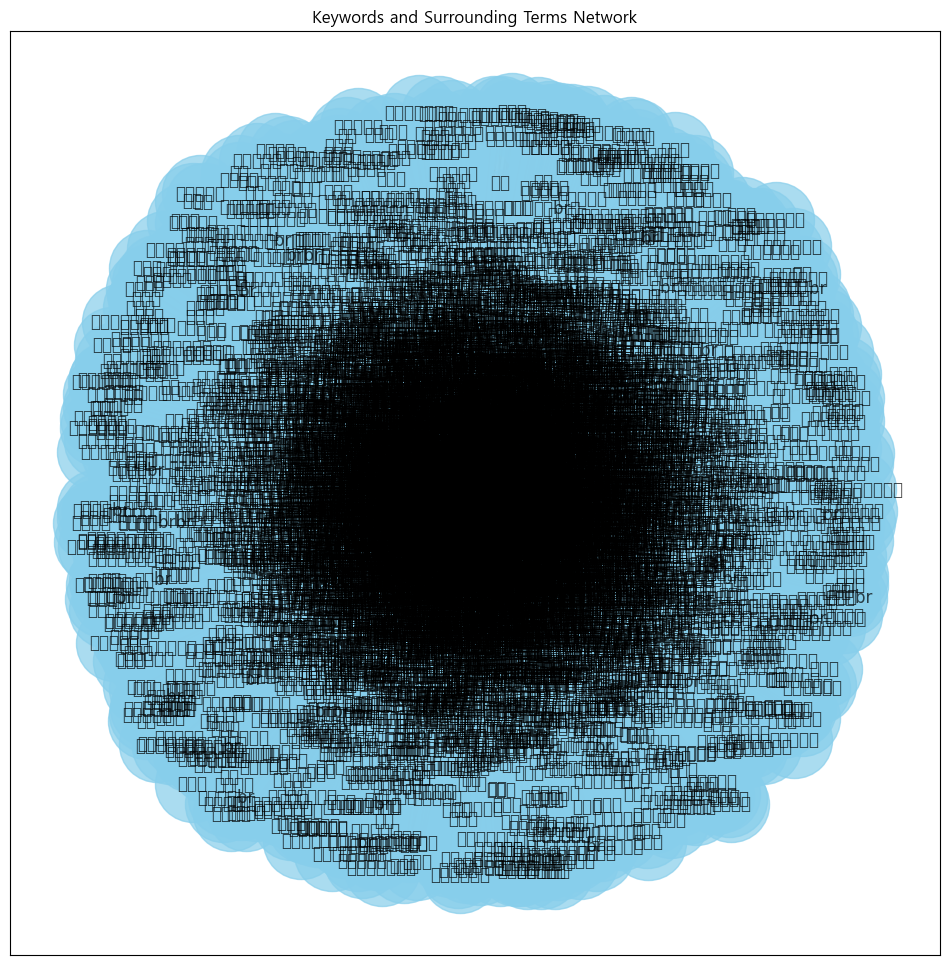

KeyboardInterrupt: 

In [ ]:
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. 전처리 함수 정의
def preprocess_text(text):
    text = re.sub(r'\d+', '', text)  # 숫자 제거
    text = re.sub(r'[^\w\s]', '', text)  # 특수문자 제거
    text = text.replace('<br/>', ' ').replace('\n', ' ').replace('\r', ' ')
    return text

# 2. 데이터프레임의 열에서 '판례내용' 전처리 적용
df_labor = df.copy()

# '판례내용'에 대해 전처리 적용
df_labor['판례내용'] = df_labor['판례내용'].apply(preprocess_text)

# 3. 키워드 정의 (주변 단어 분석할 키워드들)
keywords = ['기업', '근로자', '계약', '업무', '회사']

# 4. CountVectorizer 사용하여 공동 출현 행렬 생성
vectorizer = CountVectorizer(vocabulary=keywords, max_features=10000)
X = vectorizer.fit_transform(df_labor['판례내용'])

# 5. 키워드와 주변 단어의 공동 출현 행렬 계산
# 공동 출현 행렬을 기반으로 상관 행렬을 계산하기 위해 전체 단어를 사용한 CountVectorizer 적용
cv = CountVectorizer(max_features=10000)
X_full = cv.fit_transform(df_labor['판례내용'])

# 단어 리스트 추출
terms = cv.get_feature_names_out()

# 공동 출현 행렬 생성
co_occurrence_matrix = (X_full.T @ X_full).toarray()

# 6. 네트워크 분석: NetworkX 사용
G = nx.Graph()

# 상관계수가 일정 이상인 단어들만 네트워크에 추가 (상관계수 기준)
threshold = 0.05  # 상관관계가 이 값 이상인 단어들만 추가
for i in range(len(terms)):
    for j in range(i + 1, len(terms)):
        if co_occurrence_matrix[i, j] > threshold and terms[i] in keywords:
            G.add_edge(terms[i], terms[j], weight=co_occurrence_matrix[i, j])

# 7. 네트워크 시각화
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.5, iterations=50)
nx.draw_networkx(G, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=12, font_color="black", edge_color="gray", alpha=0.7)
plt.title("Keywords and Surrounding Terms Network")
plt.show()

# 8. 상관관계 히트맵 생성
plt.figure(figsize=(10, 8))
sns.heatmap(co_occurrence_matrix, cmap="YlGnBu", xticklabels=terms, yticklabels=terms, cbar=True)
plt.title("Keyword Co-occurrence Correlation Heatmap")
plt.show()


키워드 도출-> 참조판례, 참조좀누 도출

In [ ]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer

# 1. 전처리 함수 정의 (HTML 태그, 특수문자 제거)
def preprocess_text(text):
    text = re.sub(r'\d+', '', text)  # 숫자 제거
    text = re.sub(r'[^\w\s]', '', text)  # 특수문자 제거
    text = text.replace('<br/>', ' ').replace('\n', ' ').replace('\r', ' ')
    return text

# 2. 데이터프레임의 열에서 '판례내용' 전처리 적용
df_labor = df.copy()

# '판례내용'에 대해 전처리 적용
df_labor['판례내용'] = df_labor['판례내용'].apply(preprocess_text)

# 3. 전처리된 '판례내용'을 리스트로 변환
documents = df_labor['판례내용'].tolist()

# 4. TF-IDF 벡터라이저 설정 및 적용
vectorizer = TfidfVectorizer(max_features=10000, stop_words='english', min_df=2, max_df=0.95)

# 문서들을 TF-IDF 벡터화
tfidf_matrix = vectorizer.fit_transform(documents)

# 5. 각 문서에서 가장 중요한 키워드 도출 (상위 5개 키워드)
terms = vectorizer.get_feature_names_out()

# 각 문서의 중요한 키워드 추출 (상위 5개)
top_keywords_per_document = []
for i in range(tfidf_matrix.shape[0]):
    row = tfidf_matrix[i].toarray().flatten()
    top_keywords = [terms[idx] for idx in row.argsort()[-5:]]  # 상위 5개의 단어 선택
    top_keywords_per_document.append(top_keywords)

# 결과 확인
df_labor['상위키워드'] = top_keywords_per_document
print(df_labor[['판례내용', '상위키워드']].head())


In [ ]:
# 6. 참조판례 및 참조조문 매칭 함수 (가상의 데이터 예시)
def get_reference_case_and_law(keywords):
    # 예시 참조판례와 참조조문 데이터베이스 (간단한 매칭 예시)
    reference_cases = {
        '근로': ['판례 1', '판례 2'],
        '계약': ['판례 3'],
        '업무': ['판례 4', '판례 5'],
    }
    
    reference_laws = {
        '근로': ['조문 1', '조문 2'],
        '계약': ['조문 3'],
        '업무': ['조문 4', '조문 5'],
    }
    
    # 키워드에 해당하는 참조판례와 참조조문을 찾음
    matching_cases = []
    matching_laws = []
    
    for keyword in keywords:
        if keyword in reference_cases:
            matching_cases.extend(reference_cases[keyword])
        if keyword in reference_laws:
            matching_laws.extend(reference_laws[keyword])
    
    return matching_cases, matching_laws

# 7. 도출된 키워드에 따라 참조판례 및 참조조문 제시
df_labor['참조판례'], df_labor['참조조문'] = zip(*df_labor['상위키워드'].apply(get_reference_case_and_law))

# 결과 확인
print(df_labor[['상위키워드', '참조판례', '참조조문']].head())


분석 과정:
텍스트 전처리: 텍스트를 깨끗하게 만들고, 분석에 적합한 형태로 변환합니다.
공동 출현 네트워크 생성: 단어들 간의 공동 출현(co-occurrence)을 기반으로 네트워크를 만듭니다.
중심성 계산: 네트워크에서 중심성을 계산하여 특정 주제의 중심 단어를 찾습니다.
연관 단어 확인: 특정 단어와 자주 함께 등장하는 단어들을 추출하고, 그 연관성을 확인합니다.

In [ ]:
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer
import networkx as nx
import matplotlib.pyplot as plt

# 1. 전처리 함수 정의
def preprocess_text(text):
    text = re.sub(r'\d+', '', text)  # 숫자 제거
    text = re.sub(r'[^\w\s]', '', text)  # 특수문자 제거
    text = text.replace('<br/>', ' ').replace('\n', ' ').replace('\r', ' ')
    return text

# 2. 데이터프레임의 열에서 '판례내용' 전처리 적용
df_labor = df.copy()

# '판례내용'에 대해 전처리 적용
df_labor['판례내용'] = df_labor['판례내용'].apply(preprocess_text)

# 3. CountVectorizer로 단어 빈도를 계산하여 공동 출현 행렬 생성
cv = CountVectorizer(max_features=10000, stop_words='english')
X = cv.fit_transform(df_labor['판례내용'])

# 단어 리스트 추출
terms = cv.get_feature_names_out()

# 공동 출현 행렬 생성
co_occurrence_matrix = (X.T @ X).toarray()

# 4. 네트워크 생성 및 분석: 특정 단어에 대한 중심성 계산
G = nx.Graph()

# 공동 출현 행렬을 기반으로 네트워크에 엣지 추가
for i in range(len(terms)):
    for j in range(i + 1, len(terms)):
        if co_occurrence_matrix[i, j] > 0:  # 공동 출현한 단어들만 엣지로 연결
            G.add_edge(terms[i], terms[j], weight=co_occurrence_matrix[i, j])

# 5. 특정 주제를 대표하는 단어 찾기 (예: '근로자')
target_word = '근로자'

# 주변 단어들의 중심성 계산 (Degree Centrality)
centrality = nx.degree_centrality(G)

# '근로자'와 연관된 단어들 (연결된 단어만 추출)
connected_words = [node for node in G.neighbors(target_word)]

# 중심성과 연관 단어들을 출력
print(f"'{target_word}'의 중심성: {centrality[target_word]}")
print(f"'{target_word}'와 연결된 단어들: {connected_words}")


In [ ]:
# 6. 네트워크 시각화
plt.figure(figsize=(12, 12))

# 네트워크의 레이아웃 설정
pos = nx.spring_layout(G, k=0.5)

# 특정 단어와 연관된 단어들만 표시
subgraph = G.subgraph([target_word] + connected_words)

# 노드 크기를 중심성에 따라 설정
node_size = [10000 * centrality[node] for node in subgraph.nodes()]

# 네트워크 그리기
nx.draw_networkx(subgraph, pos, with_labels=True, node_size=node_size, node_color="skyblue", font_size=12, edge_color="gray", alpha=0.7)

plt.title(f"'{target_word}'와 연관된 단어들 네트워크")
plt.show()


주제별로 색상 구분

In [ ]:
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer
import networkx as nx
import matplotlib.pyplot as plt

# 1. 전처리 함수 정의
def preprocess_text(text):
    text = re.sub(r'\d+', '', text)  # 숫자 제거
    text = re.sub(r'[^\w\s]', '', text)  # 특수문자 제거
    text = text.replace('<br/>', ' ').replace('\n', ' ').replace('\r', ' ')
    return text

# 2. 데이터프레임의 열에서 '판례내용' 전처리 적용
df_labor = df.copy()

# '판례내용'에 대해 전처리 적용
df_labor['판례내용'] = df_labor['판례내용'].apply(preprocess_text)

# 3. CountVectorizer로 단어 빈도를 계산하여 공동 출현 행렬 생성
cv = CountVectorizer(max_features=10000, stop_words='english')
X = cv.fit_transform(df_labor['판례내용'])

# 단어 리스트 추출
terms = cv.get_feature_names_out()

# 공동 출현 행렬 생성
co_occurrence_matrix = (X.T @ X).toarray()

# 4. 네트워크 생성 및 분석
G = nx.Graph()

# 공동 출현 행렬을 기반으로 네트워크에 엣지 추가
for i in range(len(terms)):
    for j in range(i + 1, len(terms)):
        if co_occurrence_matrix[i, j] > 0:  # 공동 출현한 단어들만 엣지로 연결
            G.add_edge(terms[i], terms[j], weight=co_occurrence_matrix[i, j])

# 5. 주제별 키워드 정의
topic_keywords = {
    '기업 관련': ['기업', '회사', '법인', '주식', '비즈니스'],
    '근로자 관련': ['근로자', '노동자', '임금', '고용', '노동'],
    '계약 관련': ['계약', '합의', '협약', '약정', '계약서'],
    '업무 관련': ['업무', '직무', '직책', '책임', '업무상'],
    '회사 관련': ['회사', '사업장', '법인', '조직', '기업'],
}

# 각 주제별로 색상을 지정
topic_colors = {
    '기업 관련': 'skyblue',
    '근로자 관련': 'orange',
    '계약 관련': 'green',
    '업무 관련': 'red',
    '회사 관련': 'purple',
}

# 6. 노드 색상 설정을 위한 함수
def get_node_color(node):
    for topic, keywords in topic_keywords.items():
        if node in keywords:
            return topic_colors[topic]
    return 'gray'  # 주제와 관련 없는 단어는 회색으로 표시

# 7. 주제별 네트워크 시각화
plt.figure(figsize=(12, 12))

# 네트워크의 레이아웃 설정
pos = nx.spring_layout(G, k=0.5)

# 노드 색상 설정
node_colors = [get_node_color(node) for node in G.nodes()]

# 노드 크기를 일관되게 설정
nx.draw_networkx(G, pos, with_labels=True, node_size=3000, node_color=node_colors, font_size=12, edge_color="gray", alpha=0.7)

# 제목 설정
plt.title("주제별 네트워크 시각화")
plt.show()


### 사전

In [19]:
import pandas as pd
from collections import Counter
from konlpy.tag import Okt
from sklearn.feature_extraction.text import CountVectorizer

불용어 제거(형태소_토큰)

In [2]:
import pandas as pd
import re  # 정규 표현식 모듈
from konlpy.tag import Okt

# 불용어 파일 로드
stopwords_file_path = r'C:\Users\user\Desktop\프로젝트 기획서\SeSac-2024\data_file\sorted_words.txt'
stopwords_pick = ['제', '호로', '등', '것', '항', '의', '금','검사','판결','거나', '유1', '상고이유', '기초', '사실', '기초사실','사고','피고','원고','피고인','사건','담당','변호사','변호인','변론','종결','소외']
pattern = r'제\d+|\d호증|\d호'   # 정규 표현식 패턴

# 불용어 파일을 읽어 불용어 목록 생성
with open(stopwords_file_path, 'r', encoding='utf-8') as f:
    stopwords = set(f.read().splitlines())

# 불용어 제거 함수 (리스트 상태로 처리)
def remove_stopwords(tokens):
    filtered_words = [
        word for word in tokens 
        if len(word) > 1 
        and word not in stopwords 
        and not word.isdigit()  # 숫자인 경우 제외
        and word not in stopwords_pick 
        and not re.match(pattern, word)
    ]
    return ' '.join(filtered_words)  # 문자열로 반환 / 리스트로 변환하지 말 것

# 불용어 제거 수행
df_labor['정제_판례내용'] = df_labor['형태소_토큰'].apply(remove_stopwords)

# 결과 확인
print(df_labor[['형태소_토큰','정제_판례내용']])

ImportError: DLL load failed while importing _multiarray_umath: 지정된 모듈을 찾을 수 없습니다.

ImportError: numpy._core.multiarray failed to import

명사추출

In [79]:
okt = Okt()

# 명사 추출 함수
def extract_nouns(text):
    nouns = okt.nouns(text)  # 텍스트에서 명사 추출
    return nouns  # 명사 리스트 반환

# 정제된 판례 내용에서 명사 추출 수행
df_labor['명사_추출'] = df_labor['정제_판례내용'].apply(extract_nouns)

df_labor['명사_추출']

4       [진해, 동부, 신용협동조합, 소송대리인, 법무, 법인, 미래, 김형석, 근로, 복...
20      [항소, 항소, 학교법인, 계명, 대학교, 소송대리인, 홍원, 대구, 지방법원, 선...
25      [항소, 항소, 전라남도, 소송대리인, 법무, 법인, 법가, 정병, 광주, 지법, ...
47      [항소, 항소, 항소, 항소, 항소, 주식회사, 하나투어, 소송대리인, 한일, 서울...
76      [재단법인, 오딘, 의학, 연구소, 소송대리인, 남희웅, 청구, 기각, 소송비용, ...
                              ...                        
9954    [법무, 법인, 광장, 원심, 서울, 남부, 지법, 선고, 상고, 기각, 상고, 이...
9959    [상고, 피상, 고인, 유한회사, 철원, 택시, 소송대리인, 박문, 원심, 서울, ...
9989    [항소, 근로, 복지, 공단, 항소, 서울, 남부, 지방법원, 선고, 취소, 대한,...
9993    [파산, 종합, 금융, 주식회사, 파산관재인, 예금, 보험, 공사, 소송대리인, 법...
9996    [항소, 국민, 건강, 보험, 공단, 항소, 근로, 복지, 공단, 청주, 지법, 충...
Name: 명사_추출, Length: 867, dtype: object

In [80]:
# 명사별 빈도 확인

# Okt 객체 생성
okt = Okt()

# 명사 추출 함수
def extract_nouns(text):
    nouns = okt.nouns(text)  # 텍스트에서 명사 추출
    return nouns  # 명사 리스트 반환

# 모든 명사 추출 (리스트 평탄화)
all_nouns = [noun for sublist in df_labor['명사_추출'] for noun in sublist]

# 단어 빈도 계산
word_freq = Counter(all_nouns)

# 결과를 데이터프레임으로 변환
freq_df = pd.DataFrame(word_freq.items(), columns=['단어', '빈도']).sort_values(by='빈도', ascending=False)

# 결과 확인
print(freq_df)

          단어     빈도
41        소외  15950
22        대한   7361
71      주식회사   6744
60        지급   6630
909       회사   6205
...      ...    ...
10522    김현정      1
10521  가사소송법      1
10520     내조      1
10516     익경      1
15687     대희      1

[15688 rows x 2 columns]


In [81]:
# 상위 100개 단어 빈도 출력
top_100_freq = freq_df.head(100)

# 결과 확인
print(top_100_freq)

#freq_df.iloc[0:100]


        단어     빈도
41      소외  15950
22      대한   7361
71    주식회사   6744
60      지급   6630
909     회사   6205
...    ...    ...
491     범위   1350
560     일부   1349
1219    공사   1347
87      행사   1320
655     기록   1288

[100 rows x 2 columns]


소문자 변경 문제 발생 하여 해결

주제도출 : 벡터화-> LDA

In [75]:
# 명사 추출 함수
def extract_nouns(text):
    nouns = okt.nouns(text)  # 텍스트에서 명사 추출
    return ' '.join(nouns)  # 리스트를 공백으로 구분된 문자열로 반환

# 정제된 판례 내용에서 명사 추출 수행
df_labor['명사_추출2'] = df_labor['정제_판례내용'].apply(extract_nouns)

# LDA를 위한 Count Vectorization
count_vectorizer = CountVectorizer()

# 결측치가 있는 경우 빈 문자열로 처리
count_data = count_vectorizer.fit_transform(df_labor['명사_추출2'].str.lower())

# LDA 모델 생성
num_topics = 5  # 주제 개수 설정
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(count_data)

# 주제 확인
for idx, topic in enumerate(lda.components_):
    print(f"주제 {idx}: ", end='')
    # 각 주제에서 가장 높은 확률을 가진 단어 5개 출력
    print([count_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-5:]])

주제 0: ['대한', '처분', '회사', '보험', '소외']
주제 1: ['교육', '출입', '내용', '대한', '카지노']
주제 2: ['상고', '이유', '근로자', '업무', '사업']
주제 3: ['이유', '임금', '규정', '근로자', '지급']
주제 4: ['회사', '행위', '대한', '주식회사', '소외']


참고____/전처리_불용어제거/ 사용안함

In [ ]:
import pandas as pd
from collections import Counter
from konlpy.tag import Okt
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# Okt 객체 생성
okt = Okt()

# 명사 추출을 위한 리스트 초기화
nouns = []

# 판례내용_정제 열의 각 문서에 대해 명사 추출
for doc in df_labor['판례내용_정제']:  # df_labor() 대신 df_labor['판례내용_정제'] 사용
    nouns.extend(okt.nouns(doc))

# 명사 빈도 계산
word_freq = Counter(nouns)
most_common_words = word_freq.most_common(100)

# 가장 많이 사용되는 명사 출력
print(most_common_words)


[('피고인', 6106), ('원고', 4342), ('소외', 4180), ('것', 4071), ('등', 3196), ('사건', 3061), ('피고', 2815), ('대한', 2094), ('사실', 1862), ('이유', 1777), ('회사', 1750), ('인정', 1704), ('행위', 1664), ('지급', 1650), ('규정', 1533), ('경우', 1513), ('사업', 1474), ('임용', 1427), ('주식회사', 1376), ('주장', 1349), ('판단', 1337), ('의', 1330), ('업무', 1326), ('근로자', 1232), ('판결', 1187), ('기재', 1138), ('재', 1107), ('결정', 1051), ('기간', 960), ('계약', 939), ('내용', 923), ('법', 895), ('경', 895), ('해당', 868), ('부분', 862), ('법률', 838), ('함', 795), ('은', 771), ('원심', 769), ('근로', 744), ('보험', 738), ('위반', 736), ('바', 733), ('처분', 731), ('액', 716), ('위', 707), ('선고', 705), ('금액', 694), ('사이', 683), ('임금', 669), ('청구', 668), ('원', 653), ('관계', 623), ('사정', 619), ('발생', 618), ('취지', 615), ('절차', 605), ('위원회', 602), ('이하', 595), ('자동차', 585), ('거래', 572), ('상고', 565), ('거부', 562), ('증거', 559), ('점', 555), ('로서', 551), ('의무', 547), ('퇴직', 547), ('변경', 541), ('카지노', 539), ('관련', 537), ('자', 536), ('이', 530), ('여부', 523), ('로부터', 523), ('범

명사 빈도분석 -> 주제어 확보 /클러스터링 집단 확보

In [62]:
import pandas as pd
import re
from konlpy.tag import Okt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
df_labor.info()

오류 모델_에러에러

## 1.2 클래스분포 분석

타겟 변수(예: 판례의 결과 등)의 클래스 분포를 시각화

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

top_n = df_labor['판례내용_정제'].value_counts().nlargest(10)

# countplot을 사용하여 시각화
plt.figure(figsize=(10, 6))
sns.countplot(data=df_labor, y='판례내용_정제', order=top_n.index)  # y축으로 사용
plt.title('Top 10 판례내용 빈도수 분포')
plt.xlabel('빈도수')
plt.ylabel('판례내용')
plt.show()

텍스트 데이터의 경우, 클래스를 정의하고 해당 클래스의 분포를 시각화하는 것이 중요합니다. 텍스트 데이터에서 특정 주제나 카테고리에 대한 분포를 분석합니다.

In [ ]:
sns.countplot(data=df, x='target_variable')
plt.title('Class Distribution')
plt.show()


## 1.3 데이터 분포 분석

-각 특성(변수)의 분포를 확인, 
-히스토그램이나 커널 밀도 추정(KDE)을 사용

In [ ]:
df['feature_column'].hist(bins=30)
plt.title('Feature Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


각 텍스트 변수의 길이를 분석하여 텍스트의 길이 분포를 시각화

In [ ]:
df['text_length'] = df['text_column'].apply(len)
sns.histplot(df['text_length'], bins=30)
plt.title('Text Length Distribution')
plt.xlabel('Length of Text')
plt.ylabel('Frequency')
plt.show()


## 1.4 변수별 상관관계 분석

수치형 변수 간의 상관관계를 확인, - 상관 행렬을 만들고 heatmap으로 시각화

In [ ]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


## 1.4 텍스트 데이터의 토큰화 및 단어 분포 분석

텍스트를 토큰화하여 단어의 빈도수를 시각화합니다. 가장 자주 사용되는 단어를 확인

In [1]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['text_column'])
word_counts = X.toarray().sum(axis=0)
words = vectorizer.get_feature_names_out()

word_freq = pd.DataFrame({'word': words, 'count': word_counts})
top_words = word_freq.sort_values(by='count', ascending=False).head(10)

sns.barplot(x='count', y='word', data=top_words)
plt.title('Top 10 Words in Text Data')
plt.show()


ImportError: DLL load failed while importing _multiarray_umath: 지정된 모듈을 찾을 수 없습니다.

ImportError: numpy._core.multiarray failed to import

## 1.5  데이터 노이즈 확인

데이터에 이상치가 있는지 확인

1. 클래스 불균형이 발견되면, SMOTE와 같은 오버샘플링 기법을 사용할 수 있습니다.
변수 간 상관관계가 높다면, 피처 선택 기법을 고려해 볼 수 있습니다.
데이터 노이즈가 심하다면, 이상치 처리 기법이나 데이터 클리닝을 통해 데이터를 정제할 필요가 있습니다.

In [ ]:
sns.boxplot(data=df, x='feature_column')
plt.title('Boxplot for Outlier Detection')
plt.show()

## 1.5 텍스트 노이즈 확인

텍스트 데이터에서 노이즈를 확인하기 위해 비정상적으로 긴 텍스트나 특정 패턴(예: 특수 문자, 불용어 등)을 찾습니다. 예를 들어, 특정 패턴이 포함된 텍스트를 시각화합니다.

In [55]:
noise_texts = df_labor[df_labor['판례내용'].str.contains('[^a-zA-Z0-9가-힣\s]', regex=True)]
print(noise_texts)

      판례일련번호                    사건명         사건번호        선고일자       법원명 사건종류명  \
4     160470                  배당 이의   2010가합8730  2010.12.08    창원지방법원    민사   
20    172768                교수지위확인등    2009나7244  2010.12.02    대구고등법원    민사   
25    148198                부당이득금반환    2010나6204  2010.12.01    광주지방법원    민사   
47    152335                손해배상(기)   2010나41159  2010.11.26    서울고등법원    민사   
76    147678                  경업금지등  2010가합10588  2010.11.25  서울동부지방법원    민사   
...      ...                    ...          ...         ...       ...   ...   
9954   68338  배임수재·보조금의예산및관리에관한법률위반     2006도906  2006.11.23       대법원    형사   
9959   84831              해고무효확인및임금   2006다48069  2006.11.23       대법원    민사   
9989   78178                    구상금   2006나15832  2006.11.22    서울고등법원    민사   
9993  139710            부가가치세부과처분취소    2006구합590  2006.11.22    서울행정법원    세무   
9996   70601                부당이득금반환    2006나2217  2006.11.21    청주지방법원    민사   

                                       

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\user\AppData\Local\Temp\ipykernel_13392\741345362.py:1: SyntaxWarning: invalid escape sequence '\s'
  noise_texts = df_labor[df_labor['판례내용'].str.contains('[^a-zA-Z0-9가-힣\s]', regex=True)]


2. 적합한 분석 알고리즘 도출을 위한 분석
텍스트 데이터에는 다음과 같은 알고리즘이 적합할 수 있습니다:
TF-IDF: 단어의 중요도를 계산하고 이를 기반으로 문서 분류를 진행합니다.
LDA (Latent Dirichlet Allocation): 주제 모델링 기법으로, 문서의 주제를 추출합니다.
SVM, 랜덤 포레스트: 텍스트 피처(예: 벡터화된 단어들)를 사용하여 분류를 진행합니다.
딥러닝 모델: LSTM이나 BERT와 같은 모델을 사용하여 문서의 패턴을 학습하고 분류를 수행합니다.